In [349]:
## Import the necessary libraries:-



import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


from sklearn.model_selection import train_test_split
from sklearn import preprocessing


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA

In [252]:
## Load the dataset using pandas:


df = pd.read_csv(r"F:\Ineuron DS\Assignment\Music Genre\data.csv")

In [79]:
## Checking top 5 rows

df.head(5)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [5]:
# missing values 

df.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [6]:
# numerical and categorical features

num_features =[i  for i in df.columns if df[i].dtype != 'O' ]

cat_features = [i  for i in df.columns if df[i].dtype == 'O' and i != 'label']

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


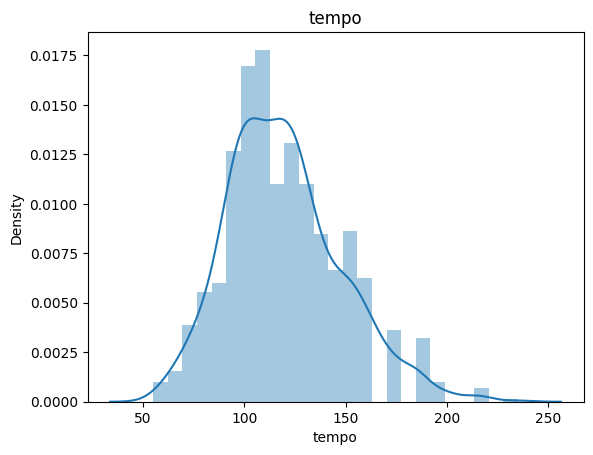

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


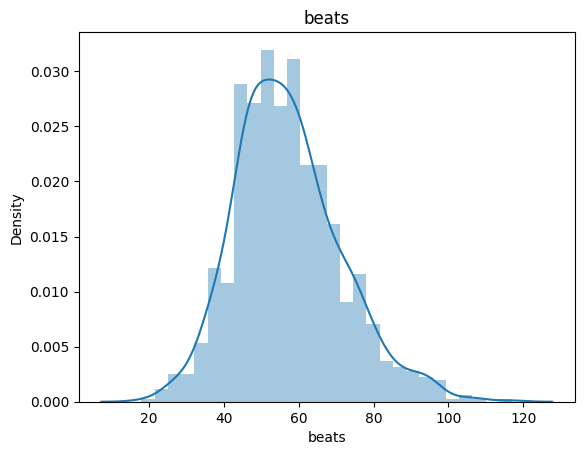

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


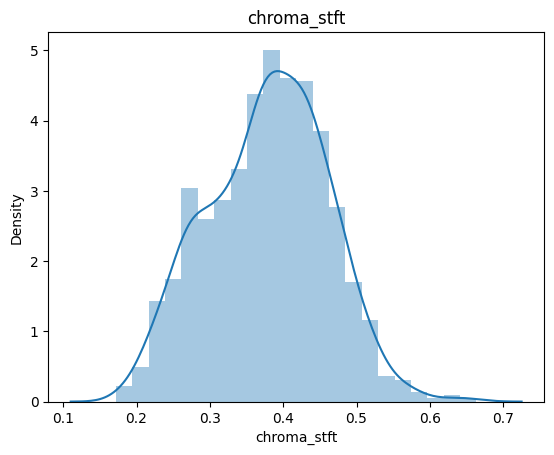

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


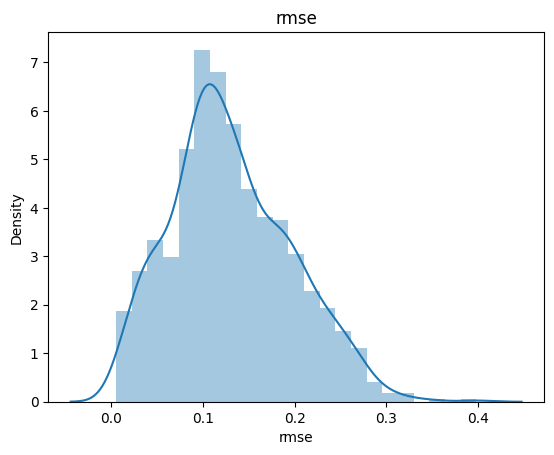

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


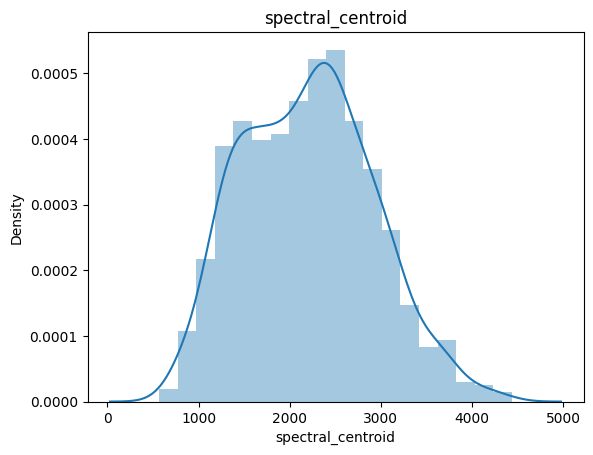

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


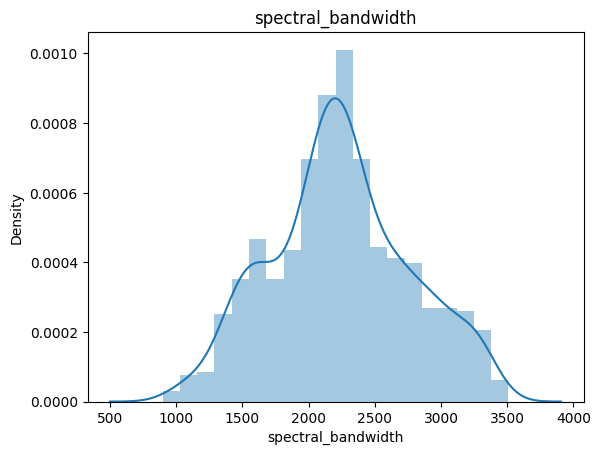

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


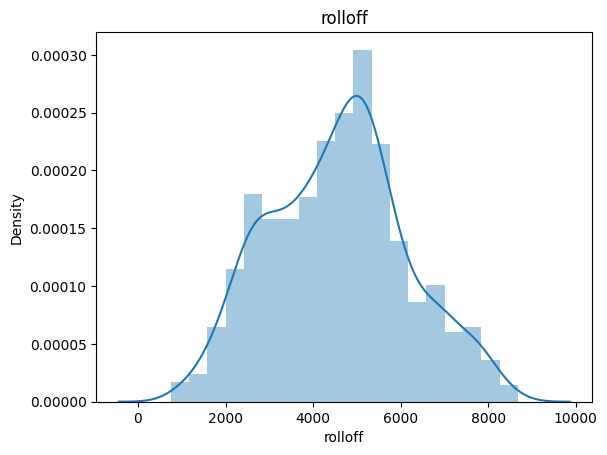

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


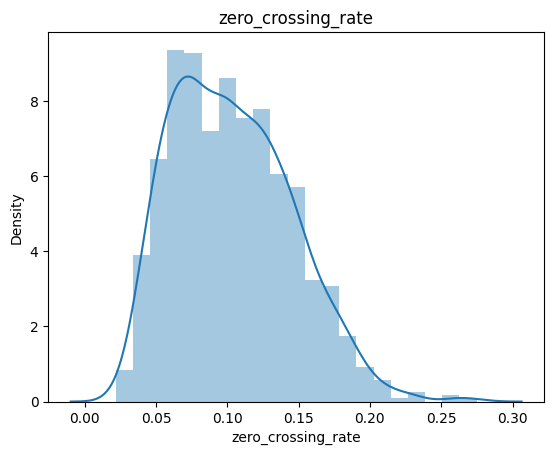

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


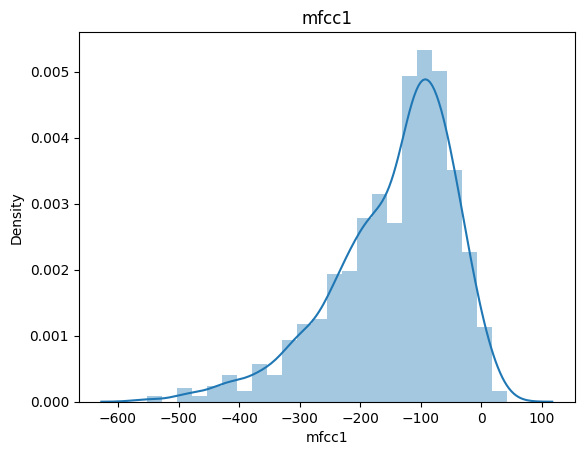

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


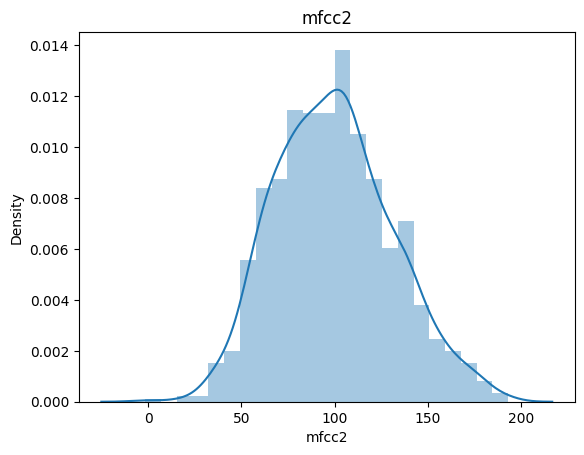

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


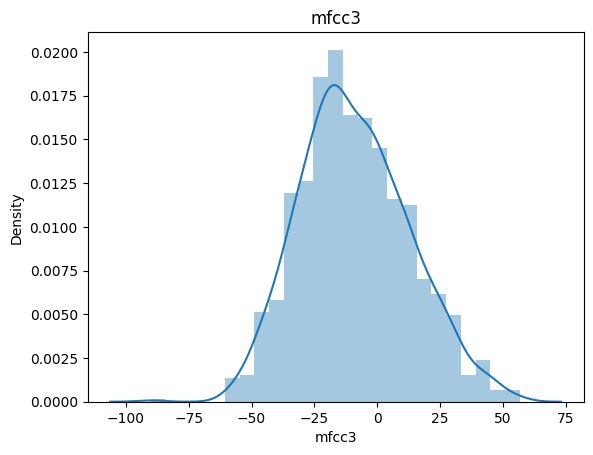

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


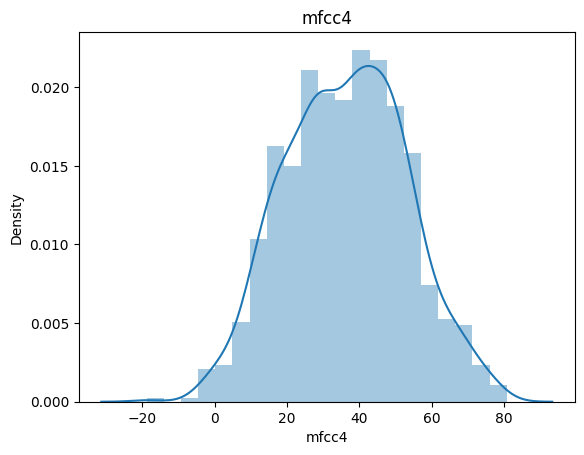

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


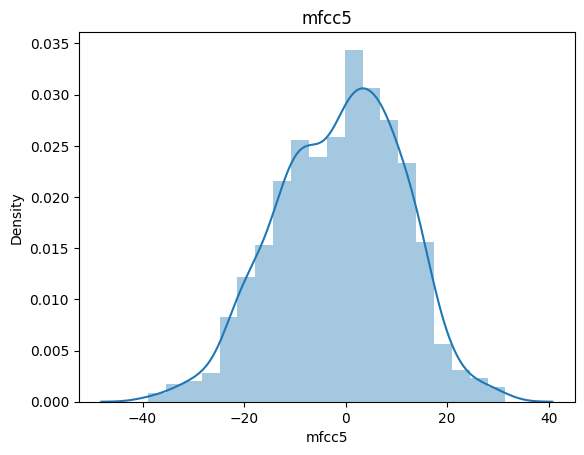

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


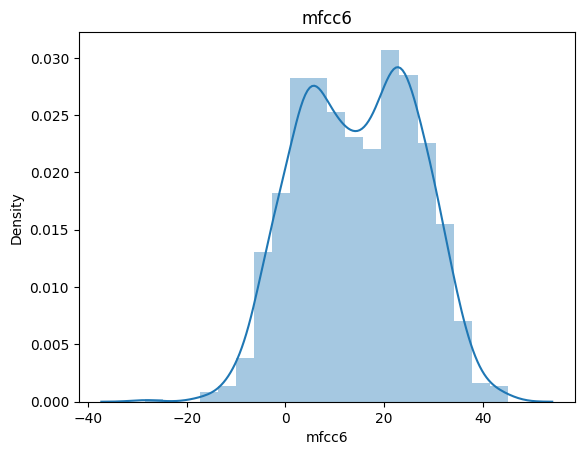

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


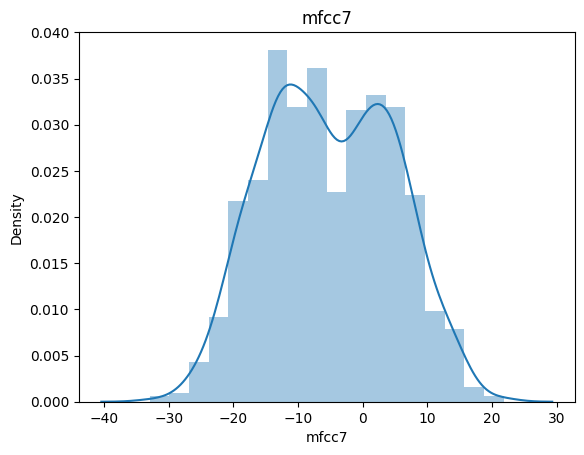

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


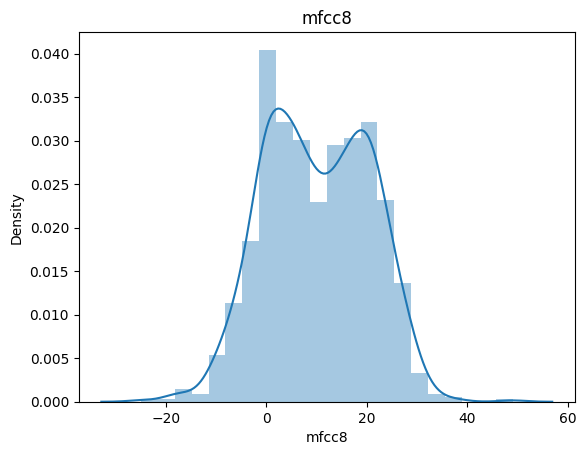

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


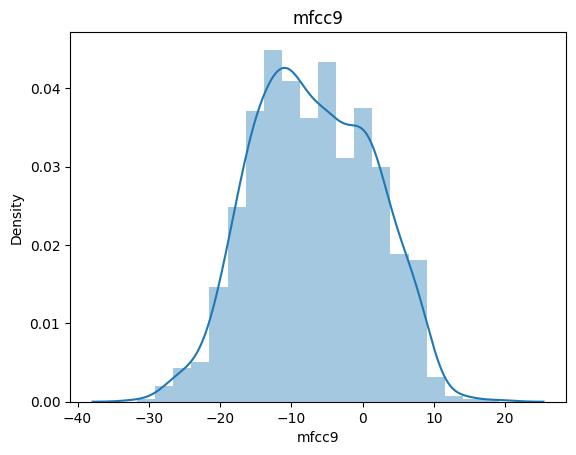

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


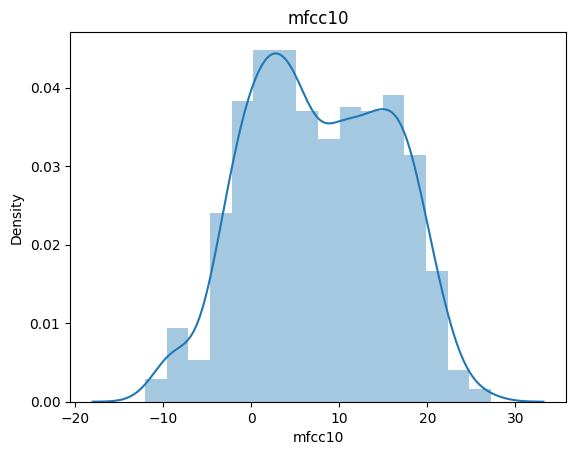

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


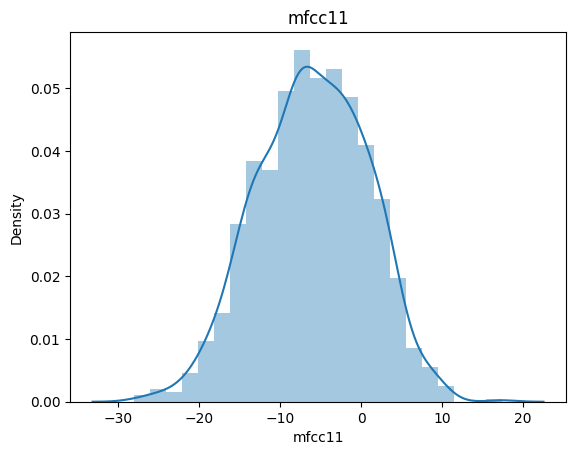

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


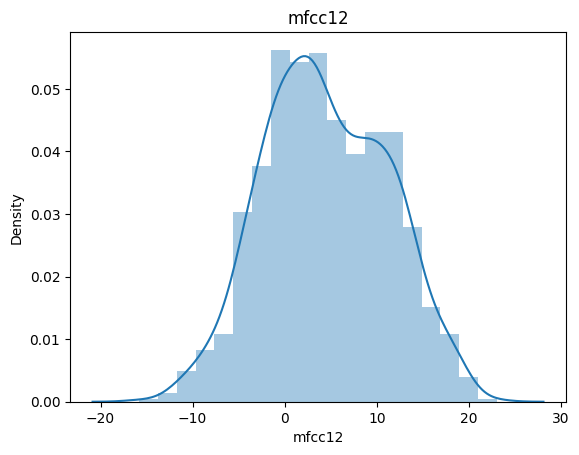

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


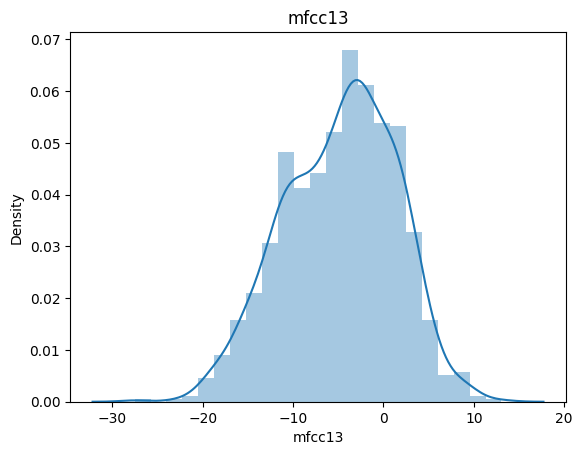

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


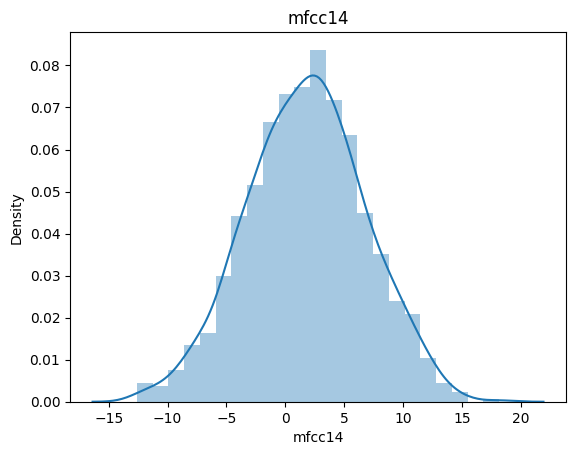

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


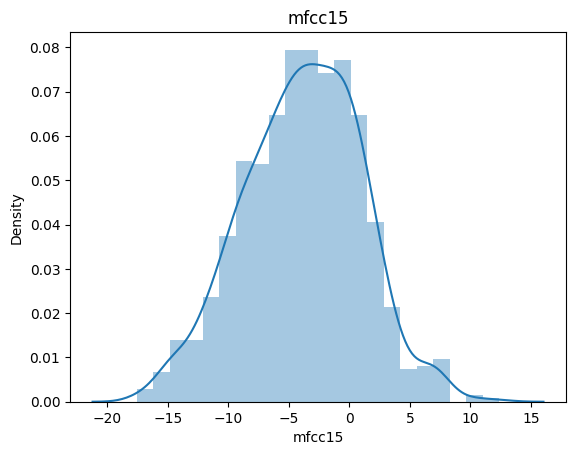

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


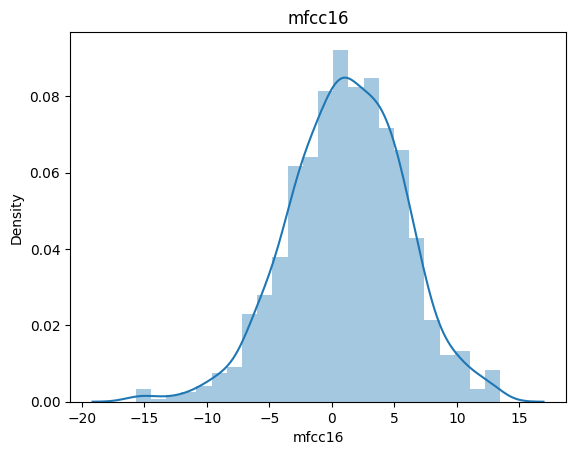

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


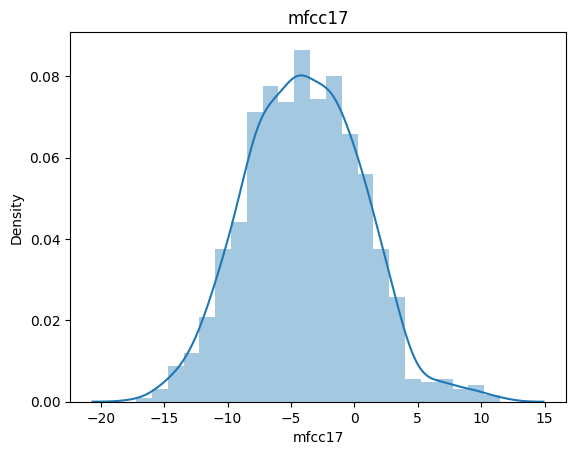

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


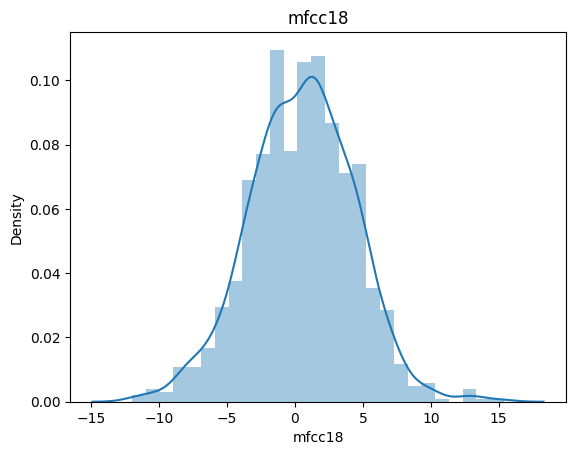

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


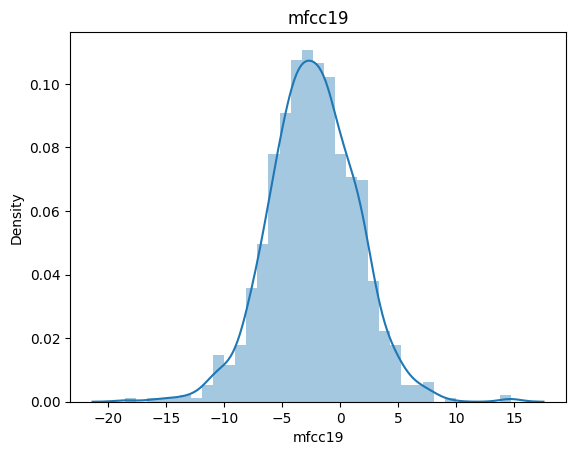

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


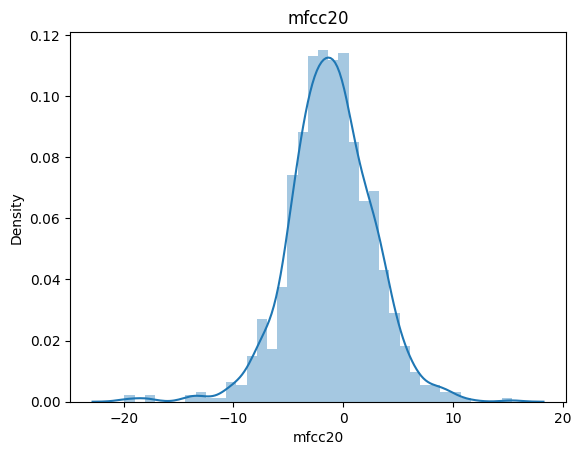

In [7]:
# Distribution

for i in num_features:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


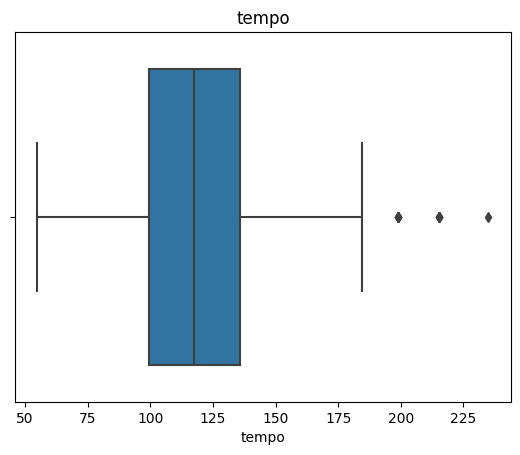

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


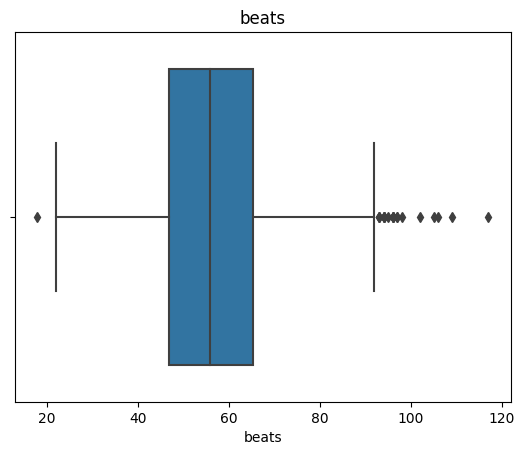

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


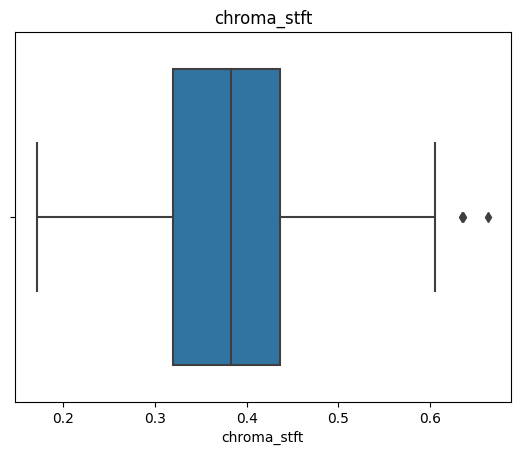

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


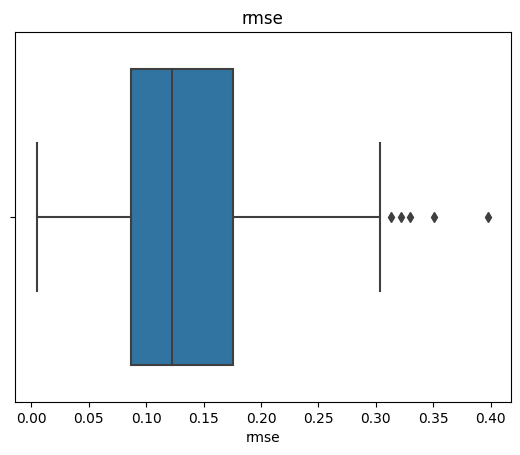

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


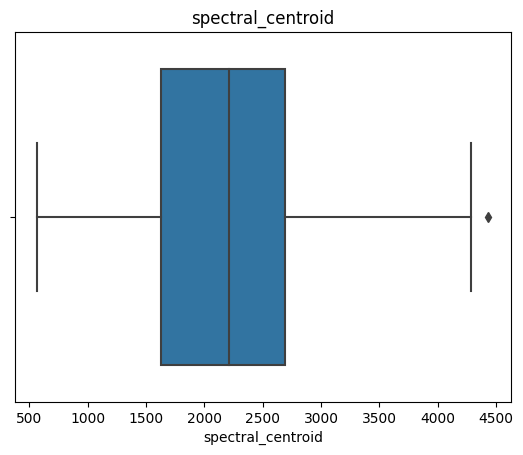

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


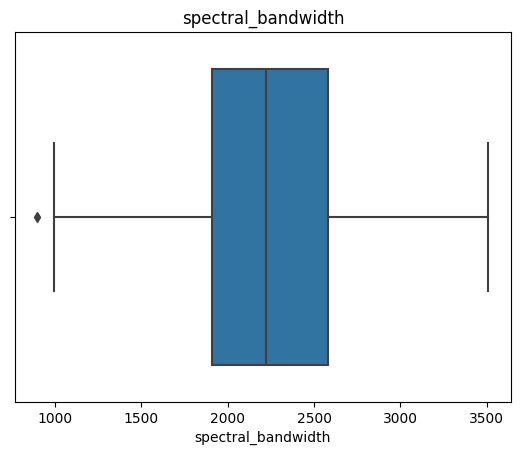

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


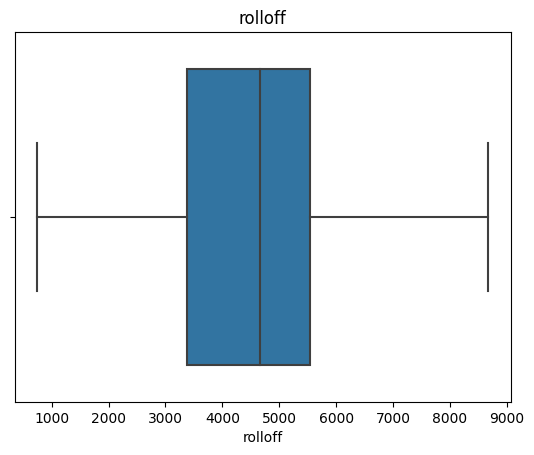

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


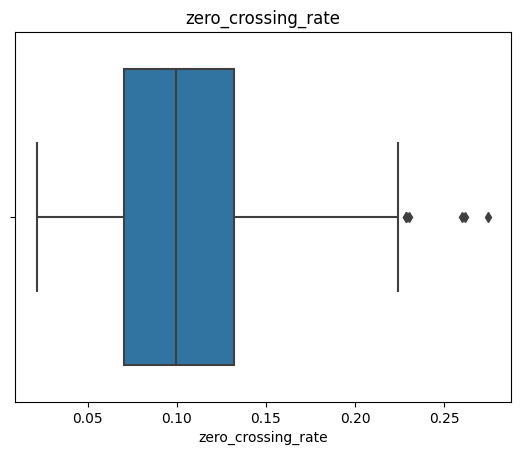

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


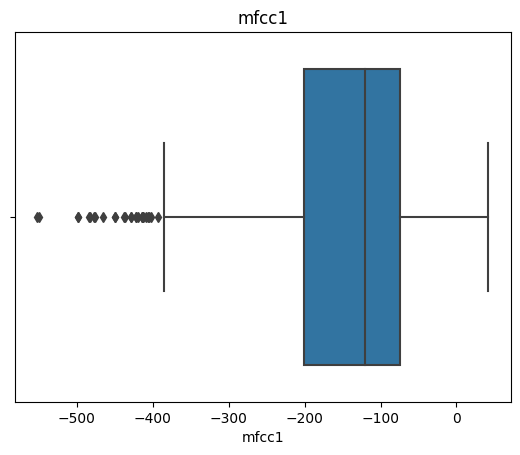

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


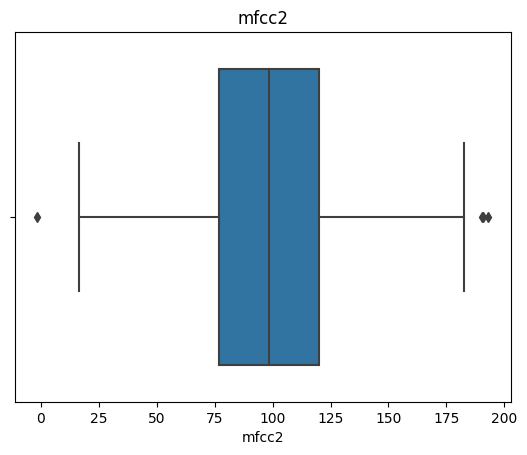

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


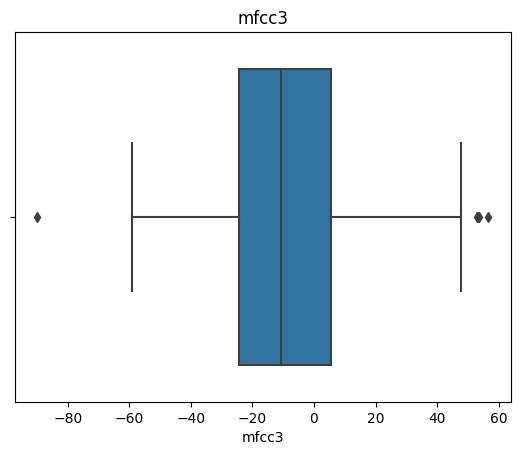

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


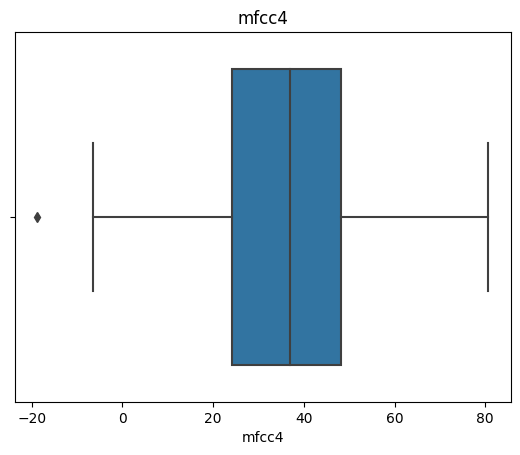

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


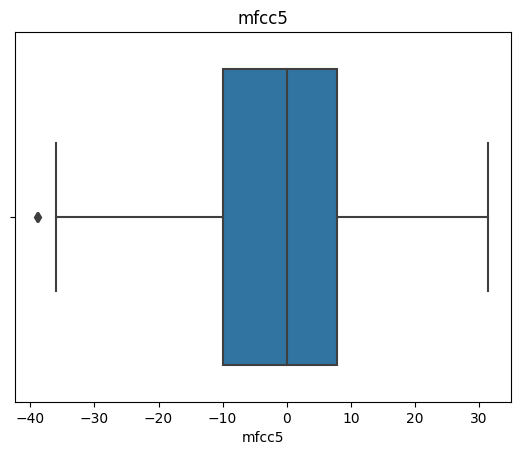

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


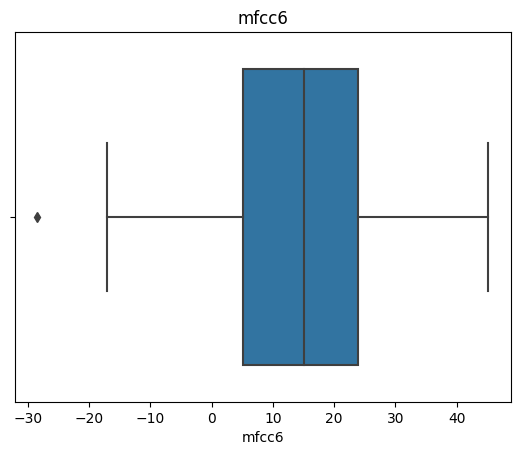

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


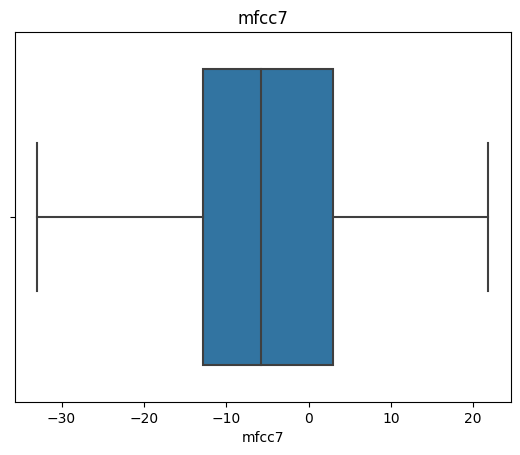

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


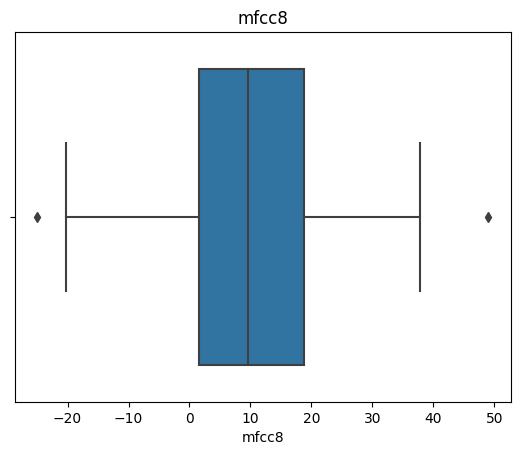

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


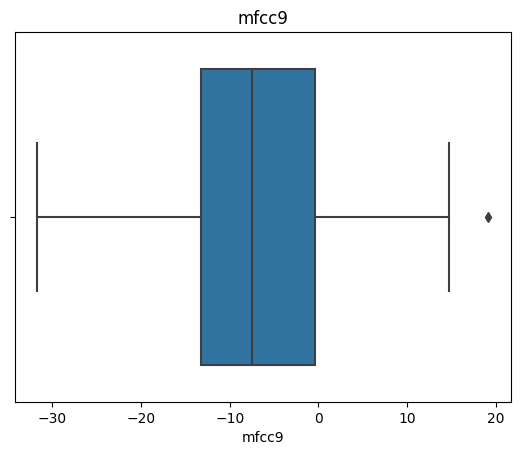

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


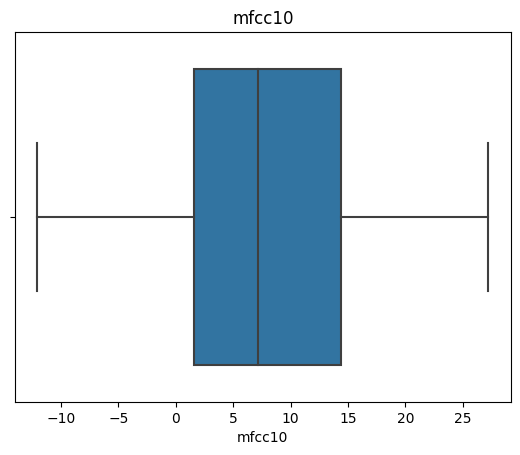

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


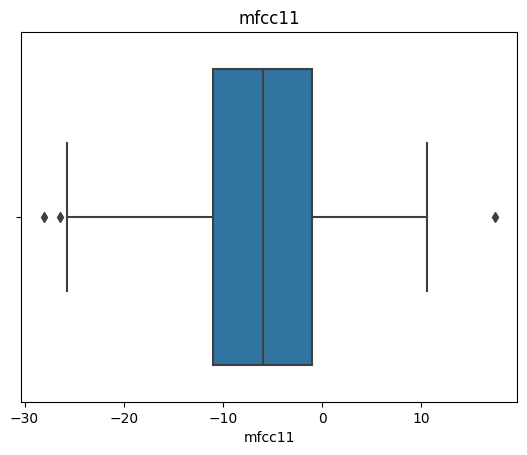

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


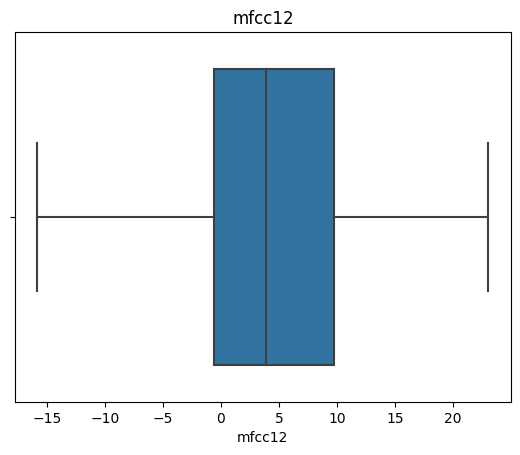

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


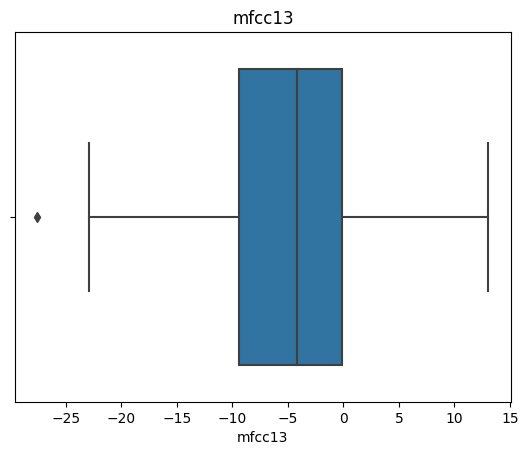

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


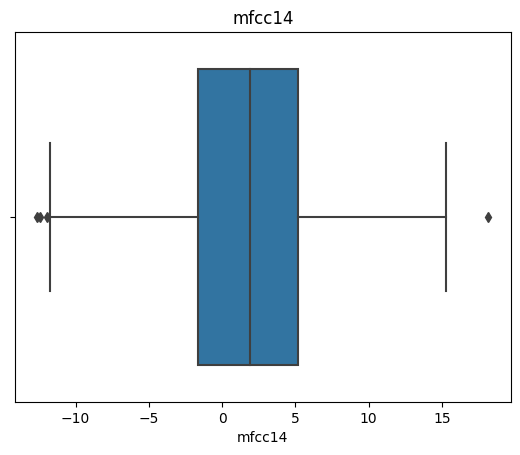

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


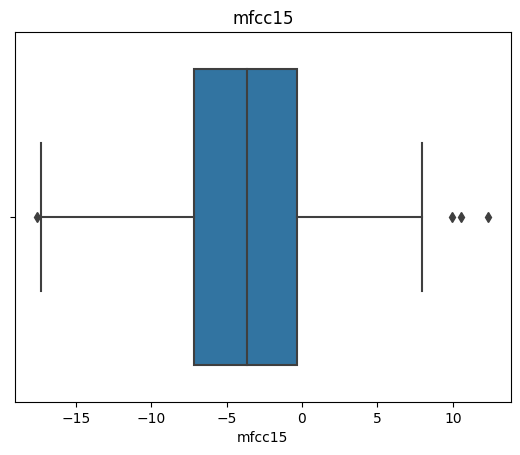

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


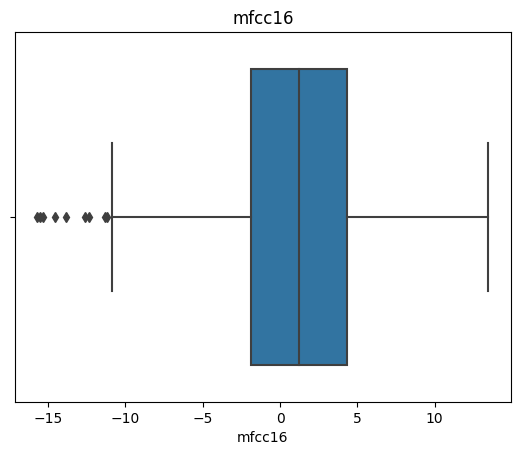

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


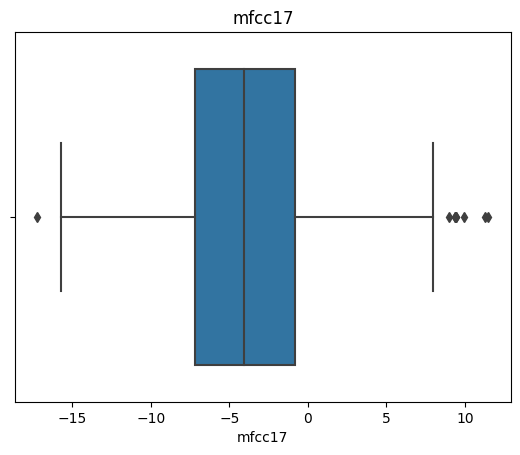

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


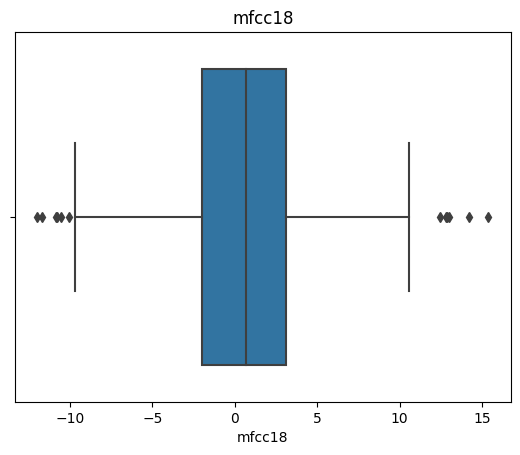

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


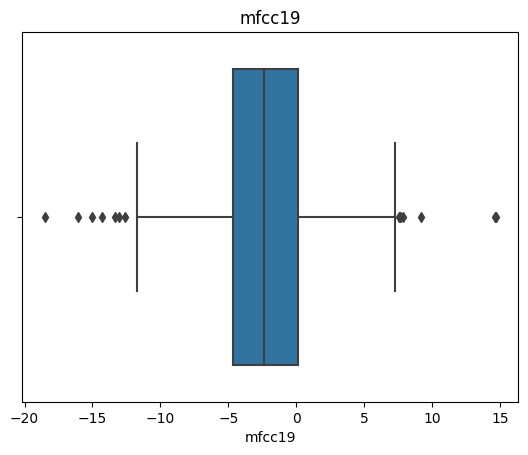

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


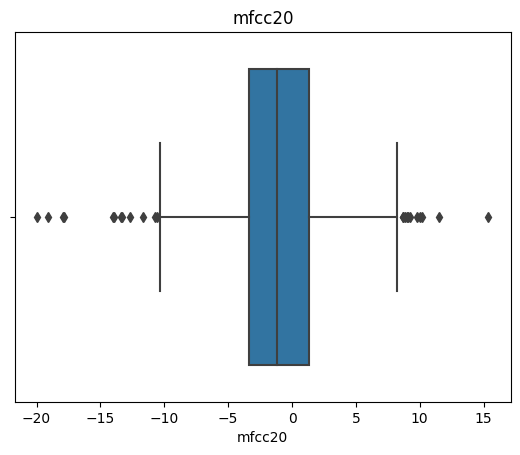

In [8]:
# outliers 

for i in num_features:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [9]:
# outliers count

for i in num_features:
    per_75 = df[i].quantile(0.75)
    per_25 = df[i].quantile(0.25)
    iqr = per_75 - per_25

    upper_limit = per_75 + 1.5 *(iqr)
    lower_limit = per_25 + 1.5*(iqr)

    outlier = len(df) - len(df[(df[i]>upper_limit) | (df[i] < lower_limit)]) 

    print(f"{i} has {round((outlier/len(df))*100,3)}% of outliers")

tempo has 9.4% of outliers
beats has 10.0% of outliers
chroma_stft has 6.4% of outliers
rmse has 10.1% of outliers
spectral_centroid has 7.9% of outliers
spectral_bandwidth has 12.7% of outliers
rolloff has 11.5% of outliers
zero_crossing_rate has 8.3% of outliers
mfcc1 has 3.6% of outliers
mfcc2 has 9.4% of outliers
mfcc3 has 10.1% of outliers
mfcc4 has 7.7% of outliers
mfcc5 has 4.9% of outliers
mfcc6 has 4.6% of outliers
mfcc7 has 5.2% of outliers
mfcc8 has 3.8% of outliers
mfcc9 has 6.1% of outliers
mfcc10 has 3.7% of outliers
mfcc11 has 5.6% of outliers
mfcc12 has 6.2% of outliers
mfcc13 has 4.7% of outliers
mfcc14 has 9.2% of outliers
mfcc15 has 5.7% of outliers
mfcc16 has 6.9% of outliers
mfcc17 has 6.8% of outliers
mfcc18 has 6.8% of outliers
mfcc19 has 7.4% of outliers
mfcc20 has 8.4% of outliers


In [253]:
# Drop filename

df.drop('filename',axis = 1,inplace = True)

In [11]:
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

### Data visualisation

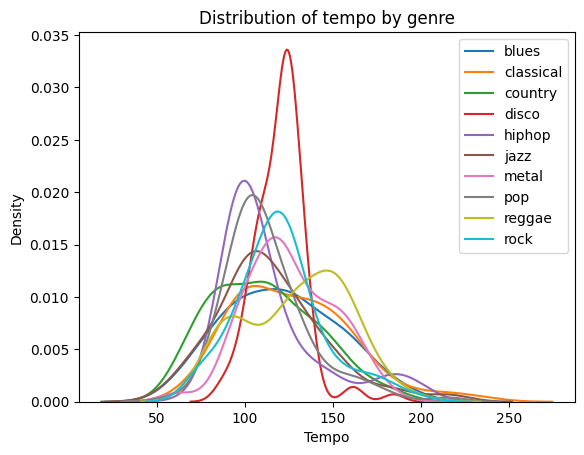

In [12]:
# Distribution of temp by its genre

sns.kdeplot(data = df.loc[df['label'] == 'blues','tempo'],label = 'blues' )
sns.kdeplot(data = df.loc[df['label'] == 'classical','tempo'],label = 'classical' )
sns.kdeplot(data = df.loc[df['label'] == 'country','tempo'],label = 'country' )
sns.kdeplot(data = df.loc[df['label'] == 'disco','tempo'],label = 'disco' )
sns.kdeplot(data = df.loc[df['label'] == 'hiphop','tempo'],label = 'hiphop' )
sns.kdeplot(data = df.loc[df['label'] == 'jazz','tempo'],label = 'jazz' )
sns.kdeplot(data = df.loc[df['label'] == 'metal','tempo'],label = 'metal' )
sns.kdeplot(data = df.loc[df['label'] == 'pop','tempo'],label = 'pop' )
sns.kdeplot(data = df.loc[df['label'] == 'reggae','tempo'],label = 'reggae' )
sns.kdeplot(data = df.loc[df['label'] == 'rock','tempo'],label = 'rock' )


plt.title('Distribution of tempo by genre')
plt.xlabel('Tempo')
plt.legend()

Text(0, 0.5, 'Mean Tempo')

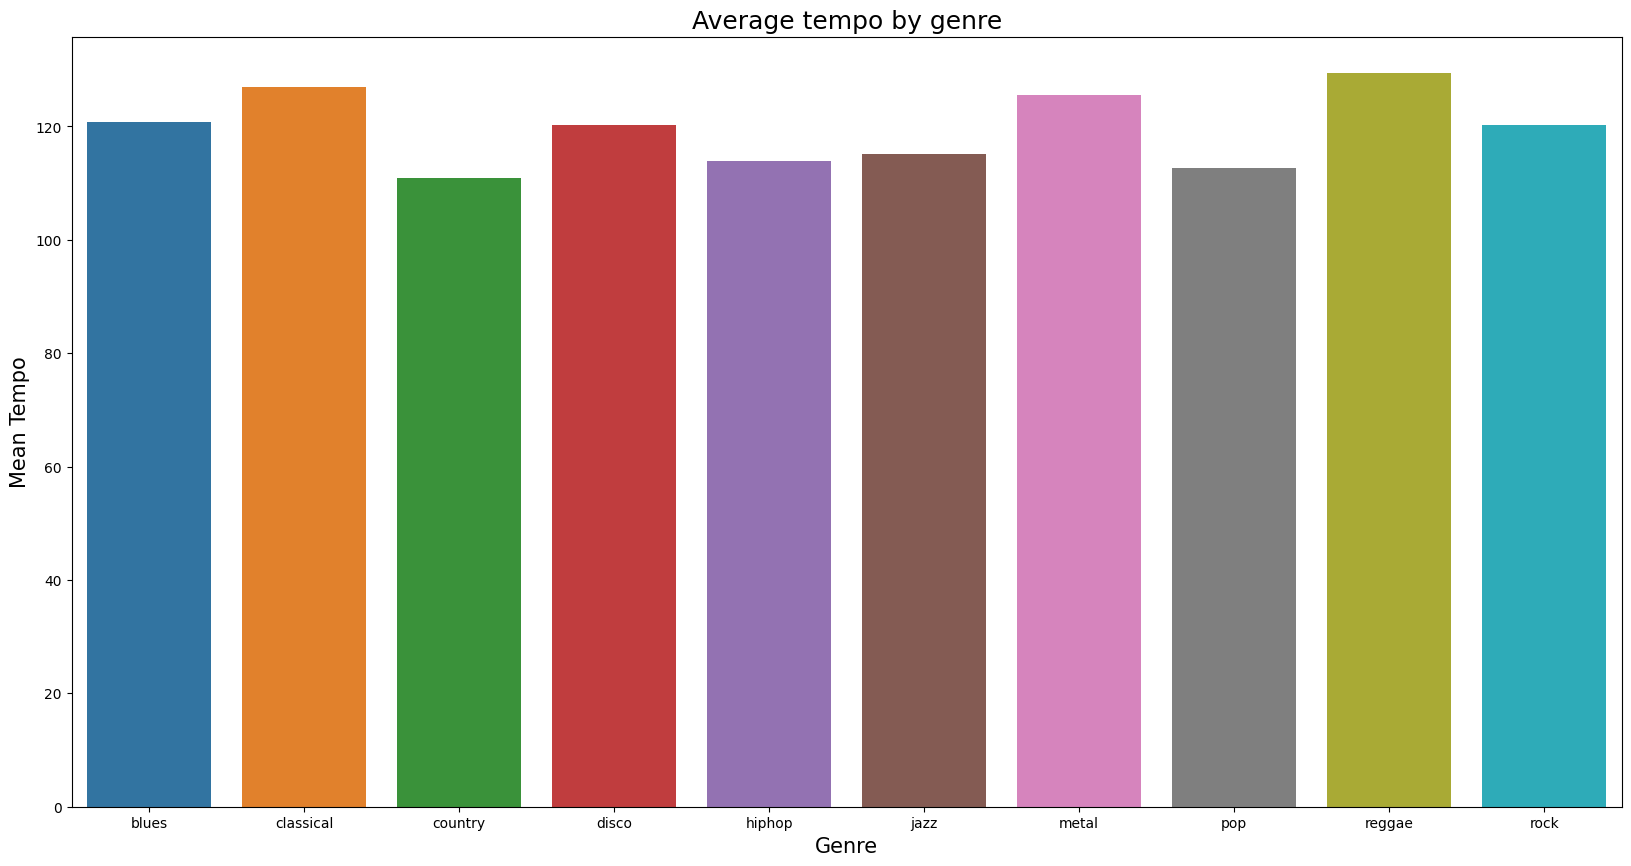

In [13]:
# temp mean


plt.figure(figsize=(20,10))

genres = df['label'].unique()

tempos = [ df[df['label']==x].tempo.mean() for x in genres ]

sns.barplot(x=genres, y=tempos)

plt.title("Average tempo by genre", fontsize = 18)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Mean Tempo', fontsize = 15)

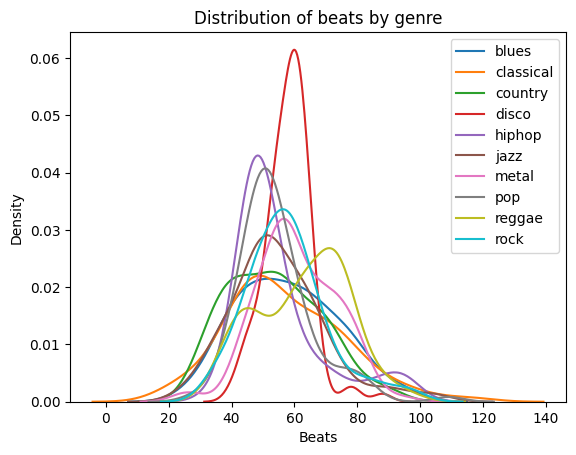

In [14]:
# Distribution of beats by its genre

sns.kdeplot(data = df.loc[df['label'] == 'blues','beats'],label = 'blues' )
sns.kdeplot(data = df.loc[df['label'] == 'classical','beats'],label = 'classical' )
sns.kdeplot(data = df.loc[df['label'] == 'country','beats'],label = 'country' )
sns.kdeplot(data = df.loc[df['label'] == 'disco','beats'],label = 'disco' )
sns.kdeplot(data = df.loc[df['label'] == 'hiphop','beats'],label = 'hiphop' )
sns.kdeplot(data = df.loc[df['label'] == 'jazz','beats'],label = 'jazz' )
sns.kdeplot(data = df.loc[df['label'] == 'metal','beats'],label = 'metal' )
sns.kdeplot(data = df.loc[df['label'] == 'pop','beats'],label = 'pop' )
sns.kdeplot(data = df.loc[df['label'] == 'reggae','beats'],label = 'reggae' )
sns.kdeplot(data = df.loc[df['label'] == 'rock','beats'],label = 'rock' )


plt.title('Distribution of beats by genre')
plt.xlabel('Beats')
plt.legend()

Text(0, 0.5, 'Mean beats')

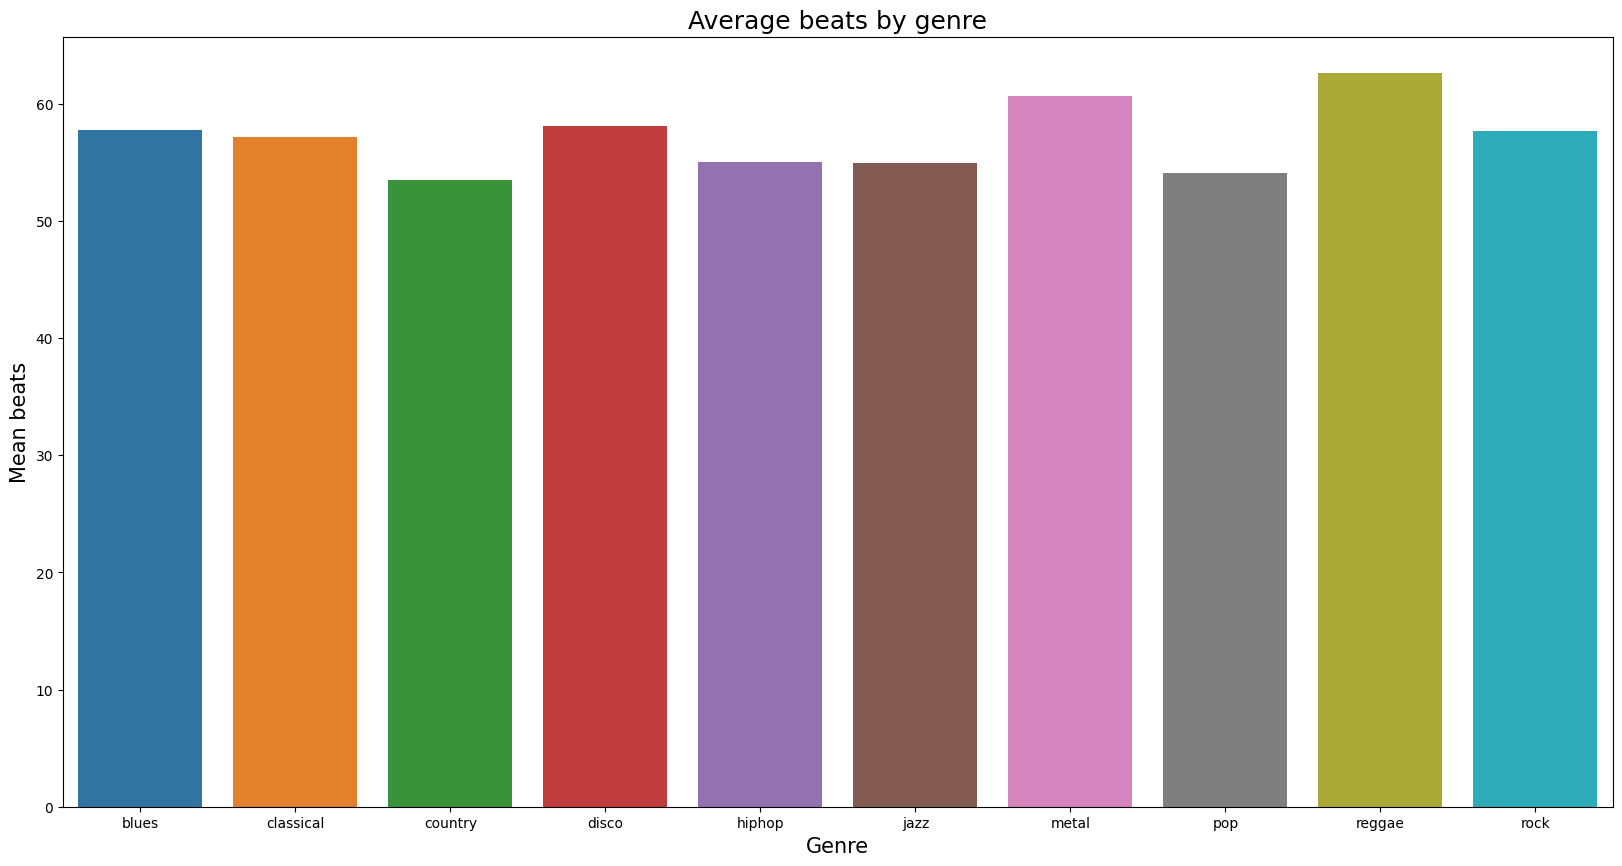

In [15]:
# beats mean

plt.figure(figsize=(20,10))

genres = df['label'].unique()

mean = [ df[df['label']==x].beats.mean() for x in genres ]

sns.barplot(x=genres, y=mean)

plt.title("Average beats by genre", fontsize = 18)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Mean beats', fontsize = 15)

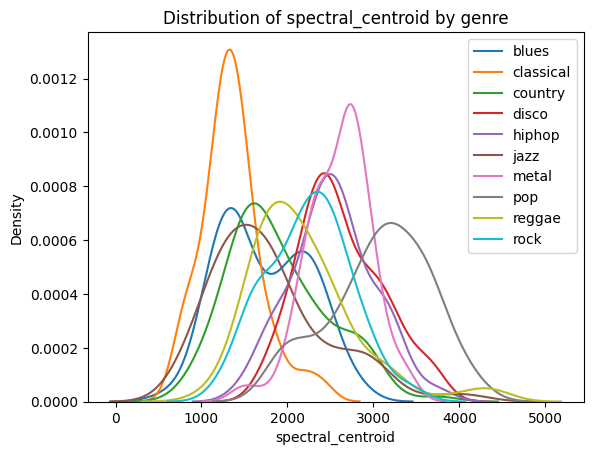

In [16]:
# Distribution of spectral_centroid by its genre

sns.kdeplot(data = df.loc[df['label'] == 'blues','spectral_centroid'],label = 'blues' )
sns.kdeplot(data = df.loc[df['label'] == 'classical','spectral_centroid'],label = 'classical' )
sns.kdeplot(data = df.loc[df['label'] == 'country','spectral_centroid'],label = 'country' )
sns.kdeplot(data = df.loc[df['label'] == 'disco','spectral_centroid'],label = 'disco' )
sns.kdeplot(data = df.loc[df['label'] == 'hiphop','spectral_centroid'],label = 'hiphop' )
sns.kdeplot(data = df.loc[df['label'] == 'jazz','spectral_centroid'],label = 'jazz' )
sns.kdeplot(data = df.loc[df['label'] == 'metal','spectral_centroid'],label = 'metal' )
sns.kdeplot(data = df.loc[df['label'] == 'pop','spectral_centroid'],label = 'pop' )
sns.kdeplot(data = df.loc[df['label'] == 'reggae','spectral_centroid'],label = 'reggae' )
sns.kdeplot(data = df.loc[df['label'] == 'rock','spectral_centroid'],label = 'rock' )


plt.title('Distribution of spectral_centroid by genre')
plt.xlabel('spectral_centroid')
plt.legend()

Text(0, 0.5, 'Mean spectral_centroid')

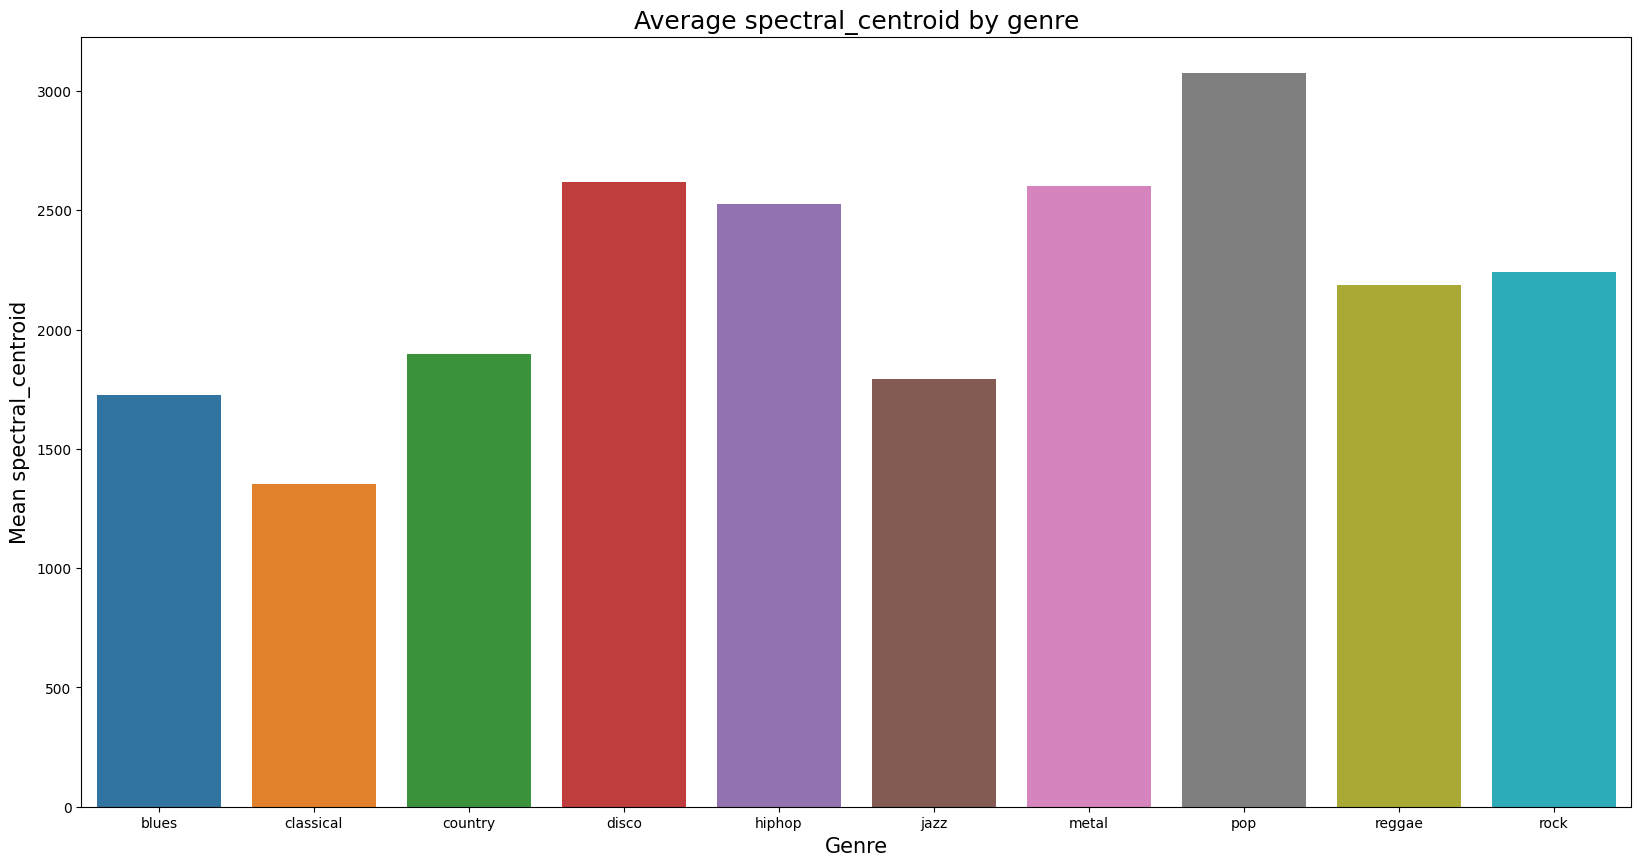

In [17]:
# spectral_centroid mean

plt.figure(figsize=(20,10))

genres = df['label'].unique()

mean = [ df[df['label']==x].spectral_centroid.mean() for x in genres ]

sns.barplot(x=genres, y=mean)

plt.title("Average spectral_centroid by genre", fontsize = 18)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Mean spectral_centroid', fontsize = 15)

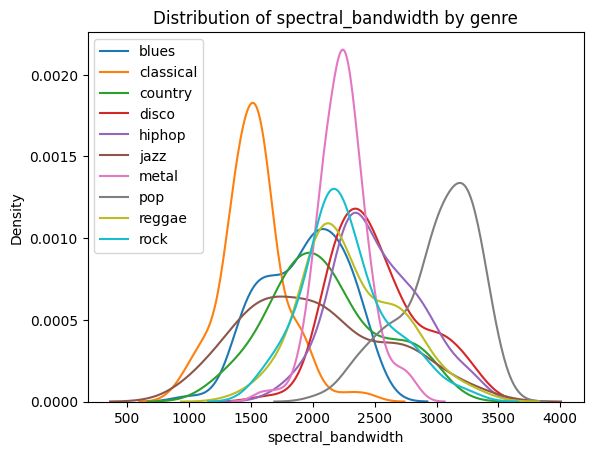

In [18]:
# Distribution of spectral_bandwidth by its genre

sns.kdeplot(data = df.loc[df['label'] == 'blues','spectral_bandwidth'],label = 'blues' )
sns.kdeplot(data = df.loc[df['label'] == 'classical','spectral_bandwidth'],label = 'classical' )
sns.kdeplot(data = df.loc[df['label'] == 'country','spectral_bandwidth'],label = 'country' )
sns.kdeplot(data = df.loc[df['label'] == 'disco','spectral_bandwidth'],label = 'disco' )
sns.kdeplot(data = df.loc[df['label'] == 'hiphop','spectral_bandwidth'],label = 'hiphop' )
sns.kdeplot(data = df.loc[df['label'] == 'jazz','spectral_bandwidth'],label = 'jazz' )
sns.kdeplot(data = df.loc[df['label'] == 'metal','spectral_bandwidth'],label = 'metal' )
sns.kdeplot(data = df.loc[df['label'] == 'pop','spectral_bandwidth'],label = 'pop' )
sns.kdeplot(data = df.loc[df['label'] == 'reggae','spectral_bandwidth'],label = 'reggae' )
sns.kdeplot(data = df.loc[df['label'] == 'rock','spectral_bandwidth'],label = 'rock' )


plt.title('Distribution of spectral_bandwidth by genre')
plt.xlabel('spectral_bandwidth')
plt.legend()

Text(0, 0.5, 'Mean spectral_bandwidth')

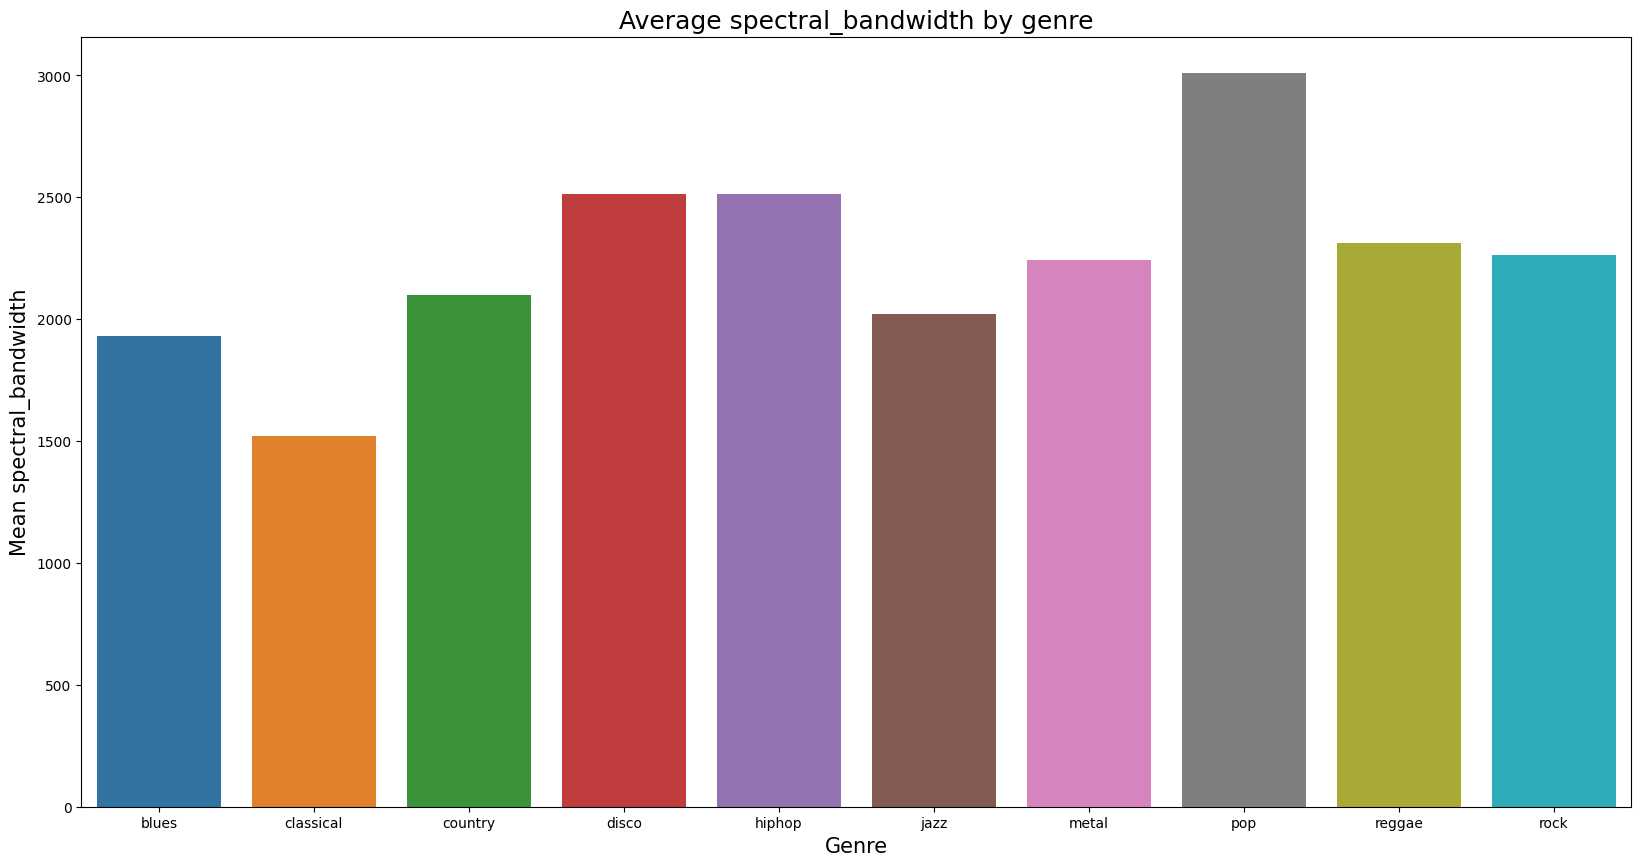

In [19]:
# spectral_bandwidth mean

plt.figure(figsize=(20,10))

genres = df['label'].unique()

mean = [ df[df['label']==x].spectral_bandwidth.mean() for x in genres ]

sns.barplot(x=genres, y=mean)

plt.title("Average spectral_bandwidth by genre", fontsize = 18)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Mean spectral_bandwidth', fontsize = 15)

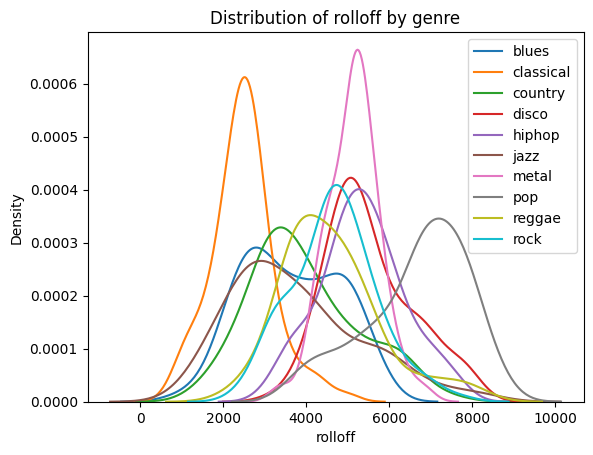

In [20]:
# Distribution of rolloff by its genre

sns.kdeplot(data = df.loc[df['label'] == 'blues','rolloff'],label = 'blues' )
sns.kdeplot(data = df.loc[df['label'] == 'classical','rolloff'],label = 'classical' )
sns.kdeplot(data = df.loc[df['label'] == 'country','rolloff'],label = 'country' )
sns.kdeplot(data = df.loc[df['label'] == 'disco','rolloff'],label = 'disco' )
sns.kdeplot(data = df.loc[df['label'] == 'hiphop','rolloff'],label = 'hiphop' )
sns.kdeplot(data = df.loc[df['label'] == 'jazz','rolloff'],label = 'jazz' )
sns.kdeplot(data = df.loc[df['label'] == 'metal','rolloff'],label = 'metal' )
sns.kdeplot(data = df.loc[df['label'] == 'pop','rolloff'],label = 'pop' )
sns.kdeplot(data = df.loc[df['label'] == 'reggae','rolloff'],label = 'reggae' )
sns.kdeplot(data = df.loc[df['label'] == 'rock','rolloff'],label = 'rock' )


plt.title('Distribution of rolloff by genre')
plt.xlabel('rolloff')
plt.legend()

Text(0, 0.5, 'Mean rolloff')

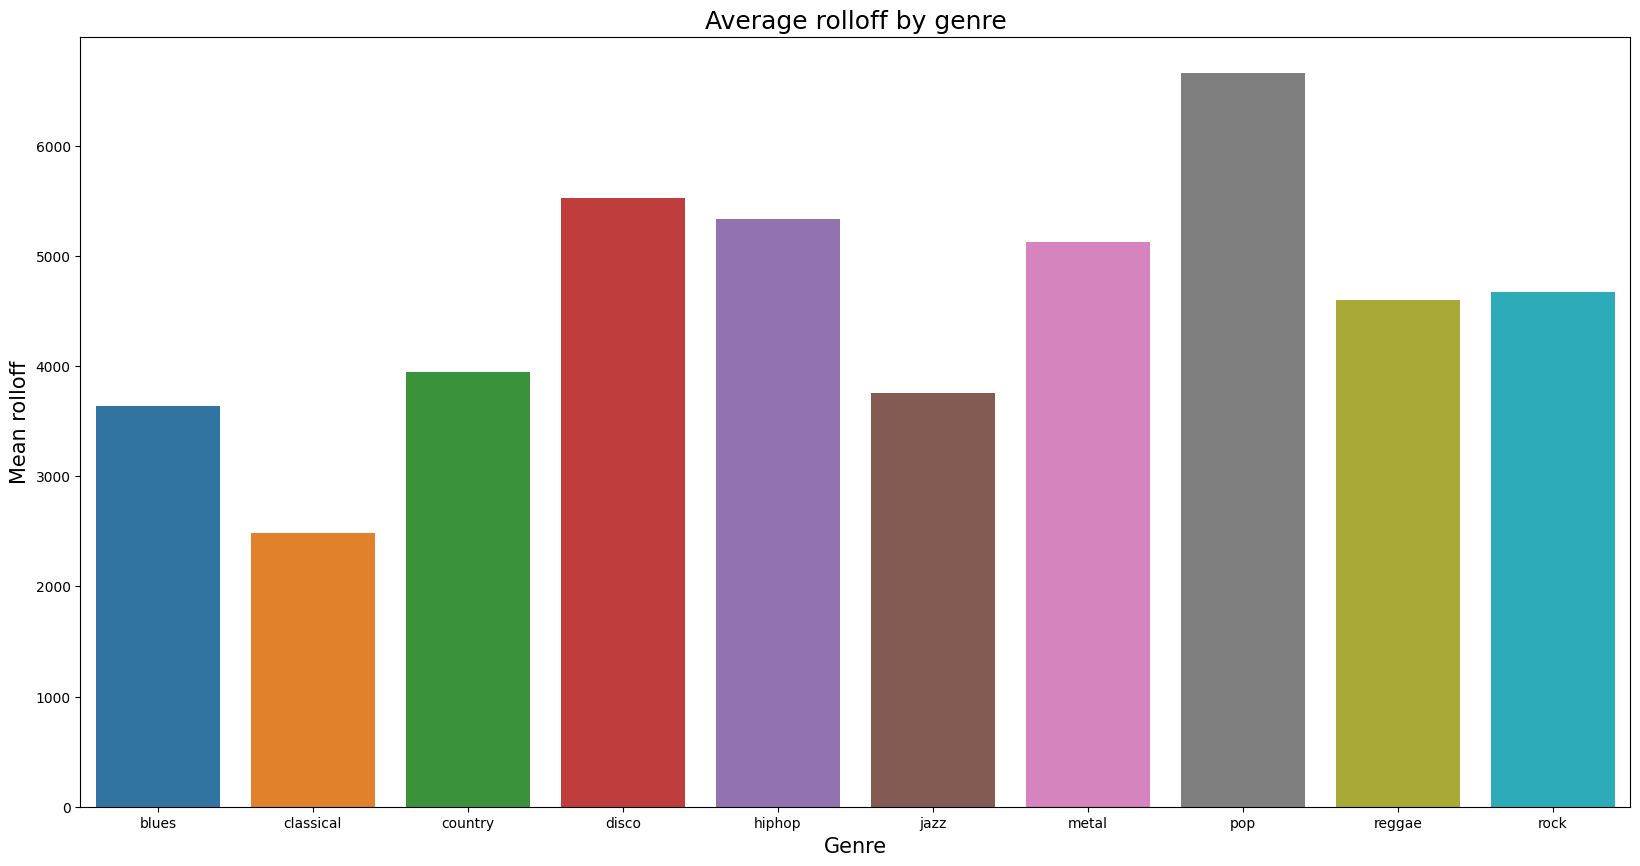

In [21]:
# spectral_bandwidth mean

plt.figure(figsize=(20,10))

genres = df['label'].unique()

mean = [ df[df['label']==x].rolloff.mean() for x in genres ]

sns.barplot(x=genres, y=mean)

plt.title("Average rolloff by genre", fontsize = 18)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Mean rolloff', fontsize = 15)

<Axes: >

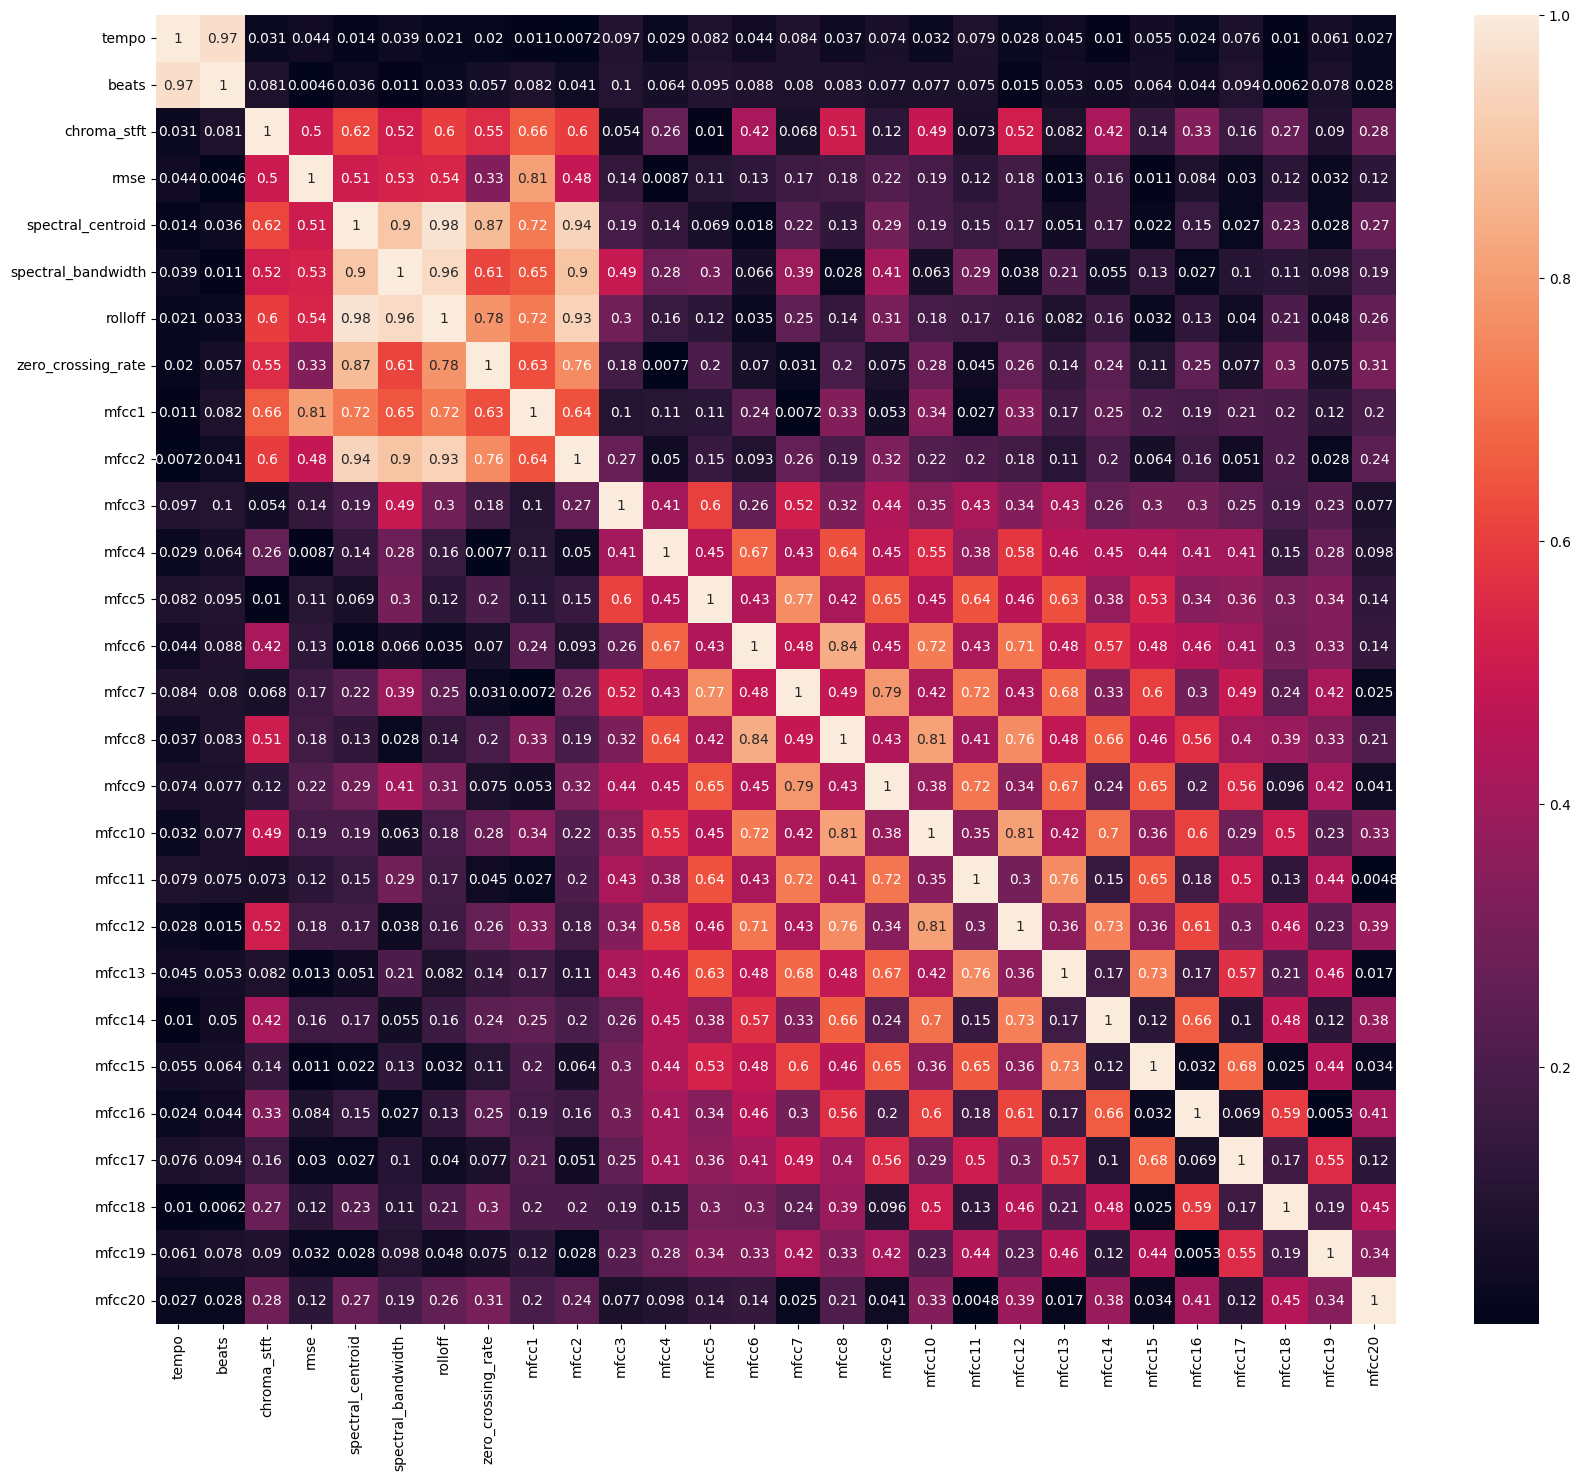

In [215]:
# Correlation 

plt.figure(figsize=(20,17))
sns.heatmap(abs(df.corr()),annot = True)

In [254]:
# Label encoder

label_encoder = preprocessing.LabelEncoder()

df['label'] = label_encoder.fit_transform(df['label'])

In [307]:
# Dependent and Independent Features -- Target as weekend and revenue

X = df.iloc[:,:-1]
y = df['label']

In [339]:
# Feature selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


rf = RandomForestClassifier(n_estimators=100)
sel = SelectFromModel(rf)
sel.fit(X, y)
sel.get_support()

selected_feat= X.columns[(sel.get_support())]

fs_X = df[selected_feat]

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


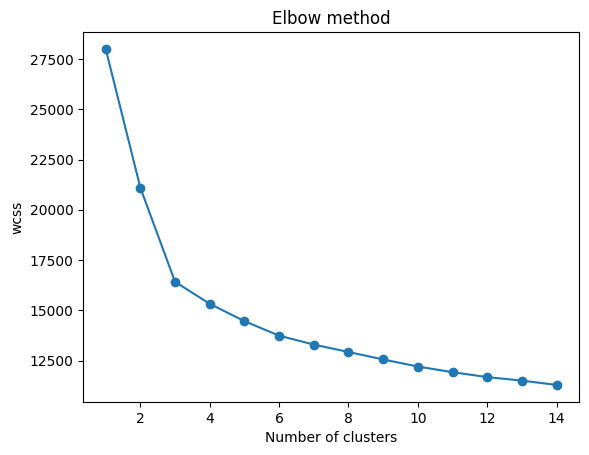

The elbow method shows that 3 is a good value for K


C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_14988\2409098323.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs_X['clusters'] = kmeans.fit_predict(fs_X)


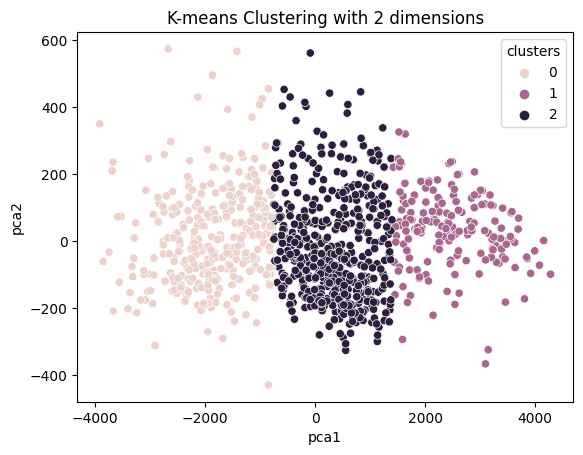

silhouette score for kmeans is 0.553724085817154


In [343]:
# Kmeans

wcss = []

for i in range(1,15):
    
    model = KMeans(n_clusters=i,init ='random', max_iter=300, n_init=10,random_state=0 )

    model.fit(fs_X)

    wcss.append(model.inertia_)

    
plt.plot(range(1,15), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

print('The elbow method shows that 3 is a good value for K')

kmeans = KMeans(n_clusters=3, init = 'random')
fs_X['clusters'] = kmeans.fit_predict(fs_X)

reduced_data = PCA(n_components=2).fit_transform(fs_X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=fs_X['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()


kmeans_score = silhouette_score(fs_X, fs_X['clusters'])
print('silhouette score for kmeans is',kmeans_score)

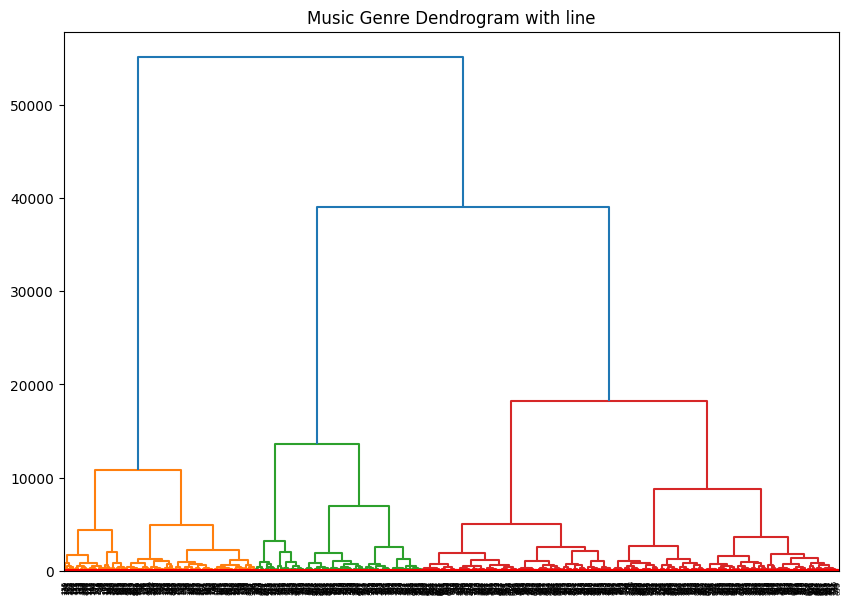

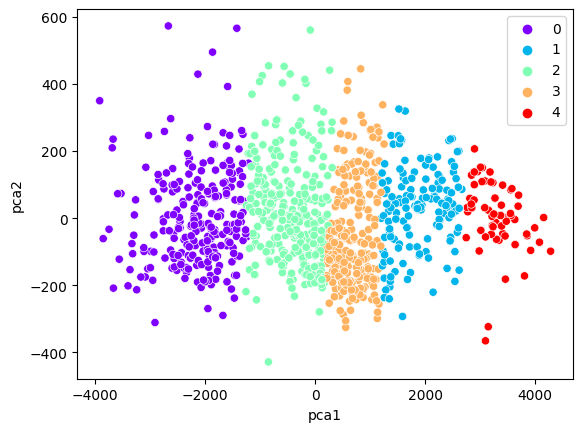

silhouette score for kmeans is 0.48058473243349514


In [347]:
# AgglomerativeClustering

plt.figure(figsize=(10, 7))

plt.title("Music Genre Dendrogram with line")

clusters = shc.linkage(fs_X, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(fs_X)

data_labels = clustering_model.labels_

reduced_data = PCA(n_components=2).fit_transform(fs_X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_labels, data=results,
                palette="rainbow")
plt.show()

aglo_score = silhouette_score(fs_X, data_labels)
print('silhouette score for kmeans is',aglo_score)